In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data[train_data.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


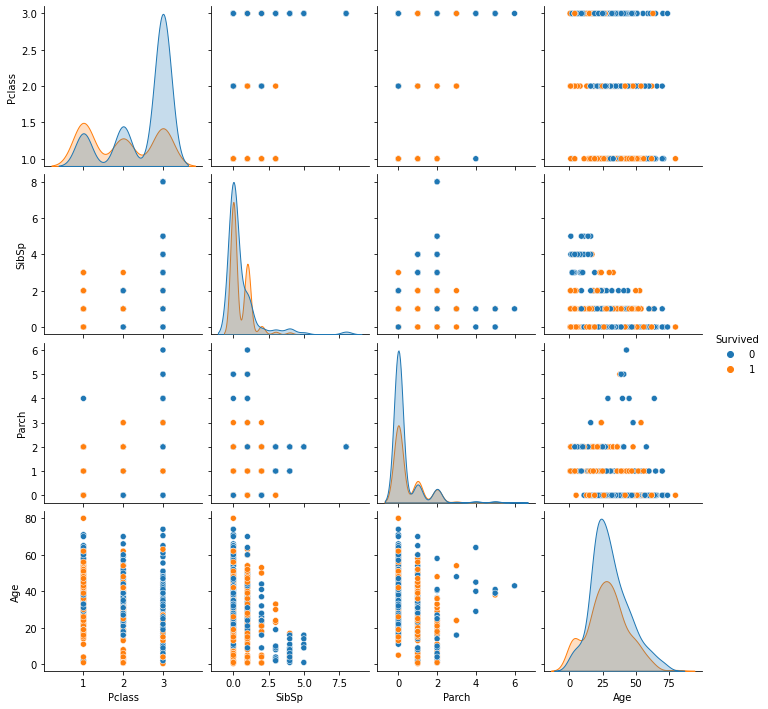

In [11]:
import seaborn as sns
sns.pairplot(train_data[['Pclass','SibSp','Parch','Age','Survived']], hue='Survived')

In [12]:
train_data.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [13]:
train_data.groupby('Pclass').mean()['Age'][3]

25.14061971830986

In [14]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return train_data.groupby('Pclass').mean()['Age'][Pclass]
    else: 
        return Age

In [15]:
def age_approx_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return test_data.groupby('Pclass').mean()['Age'][Pclass]
    else: 
        return Age

In [16]:
train_data['Age'] = train_data[['Age','Pclass']].apply(age_approx, axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(age_approx_test, axis=1)

In [17]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

# print(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [20]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

# print(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [21]:
# Don't run this. Else the competition will not accept lesser predicted values.
# test_data.dropna(subset=['Age'], axis=0, inplace=True)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

# train_data['Age'] = ss.fit_transform(train_data[['Age']])
# test_data['Age'] = ss.fit_transform(test_data[['Age']])

In [23]:
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [24]:
X.describe()

,Pclass,SibSp,Parch,Age,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,29.292875,0.352413,0.647587
std,0.836071,1.102743,0.806057,13.210527,0.477990,0.477990
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,26.000000,0.000000,1.000000
75%,3.000000,1.000000,0.000000,37.000000,1.000000,1.000000
max,3.000000,8.000000,6.000000,80.000000,1.000000,1.000000


In [25]:
X.head()

,Pclass,SibSp,Parch,Age,Sex_female,Sex_male
0,3,1,0,22.0,0,1
1,1,1,0,38.0,1,0
2,3,0,0,26.0,1,0
3,1,1,0,35.0,1,0
4,3,0,0,35.0,0,1


In [26]:
X_test.isna().sum()

Pclass        0
SibSp         0
Parch         0
Age           0
Sex_female    0
Sex_male      0
dtype: int64

In [27]:
X = ss.fit_transform(X)
# X_valid['Age'] = ss.fit_transform(X_valid[['Age']])
X_test = ss.fit_transform(X_test)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1)

In [29]:
#transform Age before splitting X

In [30]:
X

array([[ 0.82737724,  0.43279337, -0.47367361, -0.55236029, -0.73769513,
         0.73769513],
       [-1.56610693,  0.43279337, -0.47367361,  0.65947522,  1.35557354,
        -1.35557354],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.24940141,  1.35557354,
        -1.35557354],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, -0.31449064,  1.35557354,
        -1.35557354],
       [-1.56610693, -0.4745452 , -0.47367361, -0.24940141, -0.73769513,
         0.73769513],
       [ 0.82737724, -0.4745452 , -0.47367361,  0.20503691, -0.73769513,
         0.73769513]])

In [31]:
X_test

array([[ 0.87348191, -0.49947002, -0.4002477 ,  0.39320118, -0.75592895,
         0.75592895],
       [ 0.87348191,  0.61699237, -0.4002477 ,  1.35849848,  1.32287566,
        -1.32287566],
       [-0.31581919, -0.49947002, -0.4002477 ,  2.51685524, -0.75592895,
         0.75592895],
       ...,
       [ 0.87348191, -0.49947002, -0.4002477 ,  0.70209632, -0.75592895,
         0.75592895],
       [ 0.87348191, -0.49947002, -0.4002477 , -0.41549052, -0.75592895,
         0.75592895],
       [ 0.87348191,  0.61699237,  0.61989583, -0.41549052, -0.75592895,
         0.75592895]])

In [32]:
#Function to generate model scores
##Ignore. Model also needs to be passed.

In [33]:
# def print_scores(pred_y, given_x, given_y):
#     print("\nMAE: %.4f" % mean_absolute_error(pred_y, given_y))
#     print('R-Squared: %.2f' % model_d.score(given_x, given_y))
#     from sklearn import metrics
#     print(metrics.classification_report(given_y, pred_y))

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
model_d = DecisionTreeRegressor(random_state=1)
model_d.fit(X_train, y_train)

pred_d_train = model_d.predict(X_train)
pred_d_test = model_d.predict(X_valid)

print('TRAIN DATA')
print("MAE in Decision Tree: %.4f" % mean_absolute_error(pred_d_train, y_train))
print('R-Squared in Decision Tree: %.2f' % model_d.score(X_train, y_train))

print('\nTEST DATA')
print('MAE in Decision Tree: %.4f' % mean_absolute_error(pred_d_test, y_valid))
print('R-Squared in Decision Tree: %.2f' % model_d.score(X_valid, y_valid))

TRAIN DATA
MAE in Decision Tree: 0.0865
R-Squared in Decision Tree: 0.82

TEST DATA
MAE in Decision Tree: 0.2513
R-Squared in Decision Tree: 0.16


In [35]:
pred_d_test
#Decision Tree generates continuous values for y

array([1.        , 0.03389831, 1.        , 0.76470588, 1.        ,
       0.09090909, 0.        , 1.        , 0.        , 0.71428571,
       0.16666667, 1.        , 0.        , 0.14285714, 0.76470588,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.625     , 0.        , 1.        , 0.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.        , 1.        ,
       0.66666667, 0.22222222, 1.        , 0.        , 0.        ,
       0.        , 0.5       , 0.03389831, 1.        , 0.1       ,
       1.        , 0.33333333, 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.14285714, 1.        , 0.5       , 0.        , 0.66666667,
       0.        , 0.66666667, 0.        , 0.5       , 0.        ,
       0.        , 0.03389831, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.5       , 0.        , 0.        , 0.03389831, 1.     

# ****Random Forest****

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(X_train, y_train)

pred_rf_train = model_rf.predict(X_train)
pred_rf_test = model_rf.predict(X_valid)

print('TRAIN DATA')
print("MAE in Random Forest Model: %.4f" % mean_absolute_error(pred_rf_train, y_train))
print('R-Squared in Random Forest Model: %.2f' % model_rf.score(X_train, y_train))

print('\nTEST DATA')
print('MAE in Random Forest Model: %.4f' % mean_absolute_error(pred_rf_test, y_valid))
print('R-Squared in Random Forest Model: %.2f' % model_rf.score(X_valid, y_valid))

# print_scores(pred_rf_train, X_train, y_train)
# print_scores(pred_rf_test, X_valid, y_valid)

TRAIN DATA
MAE in Random Forest Model: 0.1433
R-Squared in Random Forest Model: 0.86

TEST DATA
MAE in Random Forest Model: 0.2179
R-Squared in Random Forest Model: 0.78


In [37]:
# pred_rf_train

In [38]:
from sklearn import metrics
print(metrics.classification_report(y_train, pred_rf_train))
print(metrics.classification_report(y_valid, pred_rf_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       443
           1       0.87      0.73      0.79       269

    accuracy                           0.86       712
   macro avg       0.86      0.83      0.84       712
weighted avg       0.86      0.86      0.85       712

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.62      0.70        73

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.78       179



# XGB

In [39]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=1000, n_iter_no_change=5, learning_rate=0.5)

model_xgb.fit(X_train, y_train, verbose=False)

pred_xgb_train = model_xgb.predict(X_train)
pred_xgb_test = model_xgb.predict(X_valid)

print('TRAIN DATA')
print("MAE in XGB Model: %.4f" % mean_absolute_error(pred_xgb_train, y_train))
print('R-Squared in XGB Model: %.2f' % model_xgb.score(X_train, y_train))

print('\nTEST DATA')
print('MAE in XGB Model: %.4f' % mean_absolute_error(pred_xgb_test, y_valid))
print('R-Squared in XGB Model: %.2f' % model_xgb.score(X_valid, y_valid))

[08:29:31] WARNING: ../src/learner.cc:627: 
Parameters: { "n_iter_no_change" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


TRAIN DATA
MAE in XGB Model: 0.0891
R-Squared in XGB Model: 0.82

TEST DATA
MAE in XGB Model: 0.2817
R-Squared in XGB Model: 0.17


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(random_state=1)

model_lg.fit(X_train, y_train)

pred_lg_train = model_lg.predict(X_train)
pred_lg_test = model_lg.predict(X_valid)

print('TRAIN DATA')
print("MAE in Logistic Regression Model: %.4f" % mean_absolute_error(pred_lg_train, y_train))
print('R-Squared in Logistic Regression Model: %.2f' % model_lg.score(X_train, y_train))

print('\nTEST DATA')
print('MAE in Logistic Regression Model: %.4f' % mean_absolute_error(pred_lg_test, y_valid))
print('R-Squared in Logistic Regression Model: %.2f' % model_lg.score(X_valid, y_valid))

TRAIN DATA
MAE in Logistic Regression Model: 0.1924
R-Squared in Logistic Regression Model: 0.81

TEST DATA
MAE in Logistic Regression Model: 0.1955
R-Squared in Logistic Regression Model: 0.80


In [41]:
metrics.accuracy_score(y_train, pred_lg_train)

0.8075842696629213

In [42]:
metrics.accuracy_score(y_valid, pred_lg_test)

0.8044692737430168

In [43]:
print(metrics.classification_report(y_train, pred_lg_train))
print(metrics.classification_report(y_valid, pred_lg_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       443
           1       0.77      0.70      0.73       269

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.79      0.71      0.75        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [44]:
# pred_lg_train

In [45]:
# pred_lg_test

# SVM

In [46]:
from sklearn.svm import SVC
model_svc = SVC()

model_svc.fit(X_train, y_train)
pred_svc_train = model_svc.predict(X_train)
pred_svc = model_svc.predict(X_valid)

In [47]:
print(metrics.accuracy_score(y_train, pred_svc_train))
print(metrics.accuracy_score(y_valid, pred_svc))

0.8469101123595506
0.7821229050279329


In [48]:
print(metrics.classification_report(y_train, pred_svc_train))
print(metrics.classification_report(y_valid, pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       443
           1       0.85      0.72      0.78       269

    accuracy                           0.85       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.62      0.70        73

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.78       179



In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'kernel':['poly','linear','rbf','sigmoid']}

In [50]:
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']})

In [51]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [52]:
model_rf.fit(X,y)
pred_y = model_rf.predict(X)

In [53]:
X

array([[ 0.82737724,  0.43279337, -0.47367361, -0.55236029, -0.73769513,
         0.73769513],
       [-1.56610693,  0.43279337, -0.47367361,  0.65947522,  1.35557354,
        -1.35557354],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.24940141,  1.35557354,
        -1.35557354],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, -0.31449064,  1.35557354,
        -1.35557354],
       [-1.56610693, -0.4745452 , -0.47367361, -0.24940141, -0.73769513,
         0.73769513],
       [ 0.82737724, -0.4745452 , -0.47367361,  0.20503691, -0.73769513,
         0.73769513]])

In [54]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [55]:
pred_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [56]:
print(metrics.classification_report(pred_y, y))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       596
           1       0.73      0.84      0.78       295

    accuracy                           0.84       891
   macro avg       0.82      0.84      0.83       891
weighted avg       0.85      0.84      0.84       891





# Submission

In [57]:
model_rf.fit(X, y)
predictions = model_rf.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
